In [238]:
%matplotlib notebook
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt

In [239]:
%matplotlib inline
import pandas as pd
import scipy.stats as stats

In [312]:
df = pd.read_csv("CM_Dummy_Data/df.csv")
df=df.fillna(0)
#reconferenced teams that have changed conferences
df.loc[df.Name == "Louisville", "Conference Name"] = "Atlantic Coast Conference"
df.loc[df.Name == "Pittsburgh", "Conference Name"] = "Atlantic Coast Conference"
df.loc[df.Name == "Rutgers", "Conference Name"] = "Big Ten Conference"
df.loc[df.Name == "TCU", "Conference Name"] = "Big 12 Conference"
df.loc[df.Name == "Utah", "Conference Name"] = "Pac-12 Conference"
df.loc[df.Name == "West Virginia", "Conference Name"] = "Big 12 Conference"
df.loc[df.Name == "Syracuse", "Conference Name"] = "Atlantic Coast Conference"

df.head()

,Unnamed: 0,Team Code,Game Code,Rush Att,Rush Yard,Rush TD,Pass Att,Pass Comp,Pass Yard,Pass TD,...,Site,Conference Name,Subdivision,bye,New Date,Wk_x,Wk_y,outcome,points_for,points_against
0,0,8,8.074220e+12,49,268,2,30,15,230,1,...,NEUTRAL,Southeastern Conference,FBS,0,9/5/2009,0.0,0.0,Win,34.0,24.0
1,1,8,2.310010e+14,42,275,4,24,18,241,1,...,TEAM,Southeastern Conference,FBS,0,9/12/2009,0.0,0.0,Win,40.0,14.0
2,2,8,4.970010e+14,45,260,5,28,22,263,2,...,TEAM,Southeastern Conference,FBS,0,9/19/2009,0.0,0.0,Win,53.0,7.0
3,3,8,3.100080e+13,41,134,2,24,17,291,3,...,TEAM,Southeastern Conference,FBS,0,9/26/2009,0.0,0.0,Win,35.0,7.0
4,4,8,8.033420e+12,42,204,2,26,15,148,2,...,TEAM,Southeastern Conference,FBS,0,10/3/2009,0.0,0.0,Win,38.0,20.0


In [313]:
#following block determines the desired data (yard and points for games after bye week vs. non - bye week games)
df["Total Yards"]=df["Rush Yard"]+df["Pass Yard"]
#determining the average amount of yards and points after a bye week per team
byeWeeks=df[df["bye"]=="x"]
ByeWeekOffYards = byeWeeks.groupby("Name")["Total Yards"].mean()
ByeWeekOffPts = byeWeeks.groupby("Name")["points_for"].mean()
ByeWeekDefPts = byeWeeks.groupby("Name")["points_against"].mean()

#determining the average amount of yards and points after on a non-bye week per team
non_byeWeeks=df[df["bye"]!="x"]
non_ByeWeekOffYards = non_byeWeeks.groupby("Name")["Total Yards"].mean()
non_ByeWeekOffPts = non_byeWeeks.groupby("Name")["points_for"].mean()
non_ByeWeekDefPts = non_byeWeeks.groupby("Name")["points_against"].mean()

#determining the total number of W's after bye weeks
#PLEASE NOTE, IF NOT ALL TEAMS HAVE A BYE WEEK W, WE MIGHT HAVE TO ADD THEM TO THE BOTTOM OF THE ARRAY, NEED TO CHECK
byeWeek_Wins=byeWeeks[byeWeeks["outcome"] == "Win"]
byeWeek_Wins = byeWeek_Wins.groupby("Name")["outcome"].count()

In [314]:
df_ByeWeekStats = pd.merge(ByeWeekOffYards,ByeWeekOffPts, on=["Name"])
df_ByeWeekStats = pd.merge(df_ByeWeekStats,ByeWeekDefPts, on=["Name"])

df_Non_ByeWeekStats = pd.merge(non_ByeWeekOffYards,non_ByeWeekOffPts, on=["Name"])
df_Non_ByeWeekStats = pd.merge(df_Non_ByeWeekStats,non_ByeWeekDefPts, on=["Name"])

Wins = df.groupby("Name")["Team Code"].count()
df_wins = pd.merge(Wins,byeWeek_Wins, on=["Name"], how = "left")
df_wins=df_wins.fillna(0)
df_wins = df_wins.drop(["Team Code"], axis=1)

df_stats = pd.merge(df_ByeWeekStats,df_Non_ByeWeekStats, on=["Name"])
df_stats = pd.merge(df_stats,df_wins, on=["Name"])

df_stats = df_stats.rename(columns={"Total Yards_x": "Bye Week - Average Yards", "points_for_x": "Bye Week - Average Offensive Points", \
                                   "points_against_x": "Bye Week - Average Defensive Points", "Total Yards_y": "Non Bye Week - Average Yards", \
                                    "points_for_y": "Non Bye Week - Average Offensive Points", "points_against_y": "Non Bye Week - Average Defensive Points",\
                                   "outcome" : "Wins after Bye Week"})

df_stats

,Bye Week - Average Yards,Bye Week - Average Offensive Points,Bye Week - Average Defensive Points,Non Bye Week - Average Yards,Non Bye Week - Average Offensive Points,Non Bye Week - Average Defensive Points,Wins after Bye Week
Name,,,,,,,
Alabama,436.500000,27.166667,19.833333,434.770492,29.868852,9.098361,3.0
Arizona,486.142857,35.714286,25.714286,450.631579,31.105263,28.508772,3.0
Arizona State,456.400000,32.200000,23.000000,425.186441,30.389831,23.118644,3.0
Arkansas,435.000000,21.800000,26.800000,429.833333,23.466667,21.316667,1.0
Auburn,309.400000,17.200000,19.800000,428.278689,32.180328,24.360656,2.0
Baylor,593.000000,42.000000,37.400000,515.864407,31.355932,25.457627,2.0
Boston College,317.166667,17.166667,31.000000,330.637931,22.258621,23.431034,1.0
California,393.400000,24.200000,34.600000,394.543860,26.087719,29.666667,2.0
Clemson,412.666667,29.666667,15.833333,432.672131,28.540984,18.295082,4.0


In [315]:
#pulls in conference names
dfConf = df[["Name", "Conference Name"]]
dfConf=dfConf.drop_duplicates()
df_finaldata=df_stats.merge(dfConf, on='Name', how='left')
df_finaldata.head()

,Name,Bye Week - Average Yards,Bye Week - Average Offensive Points,Bye Week - Average Defensive Points,Non Bye Week - Average Yards,Non Bye Week - Average Offensive Points,Non Bye Week - Average Defensive Points,Wins after Bye Week,Conference Name
0,Alabama,436.500000,27.166667,19.833333,434.770492,29.868852,9.098361,3.0,Southeastern Conference
1,Arizona,486.142857,35.714286,25.714286,450.631579,31.105263,28.508772,3.0,Pac-12 Conference
2,Arizona State,456.400000,32.200000,23.000000,425.186441,30.389831,23.118644,3.0,Pac-12 Conference
3,Arkansas,435.000000,21.800000,26.800000,429.833333,23.466667,21.316667,1.0,Southeastern Conference
4,Auburn,309.400000,17.200000,19.800000,428.278689,32.180328,24.360656,2.0,Southeastern Conference


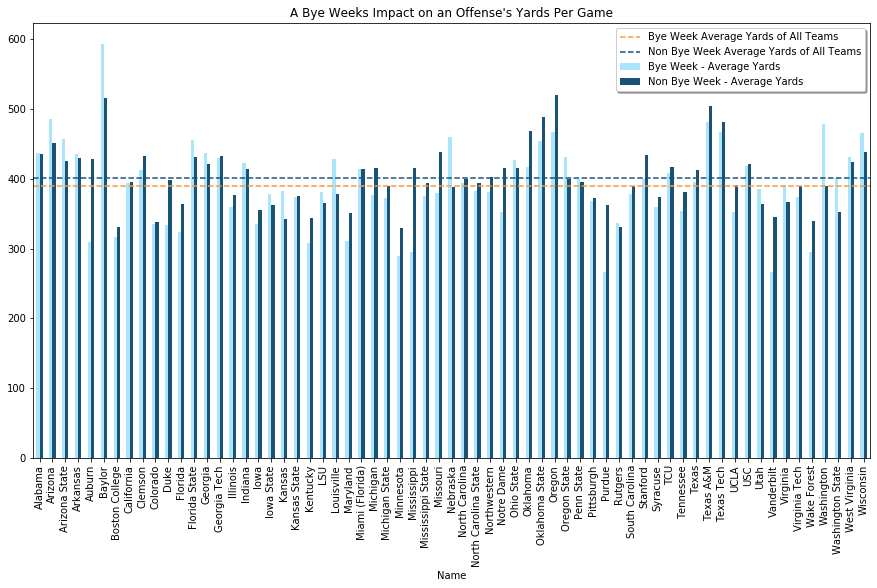

In [316]:
#bar chart for average yards

df_finaldata.plot(kind="bar", x="Name", y=["Bye Week - Average Yards", "Non Bye Week - Average Yards"], figsize=(15,8),
              title="A Bye Weeks Impact on an Offense's Yards Per Game", color = ["#ABE5FC","#1A5276"])

meanByeYards = df_finaldata["Bye Week - Average Yards"].mean()
plt.axhline(y=meanByeYards, c = "#F89C3A", ls = "--", label = "Bye Week Average Yards of All Teams")

meanNonByeYards = df_finaldata["Non Bye Week - Average Yards"].mean()
plt.axhline(y=meanNonByeYards, c = "#1A5276", ls = "--",  label = "Non Bye Week Average Yards of All Teams")
plt.legend(shadow = True)

(0, 50)

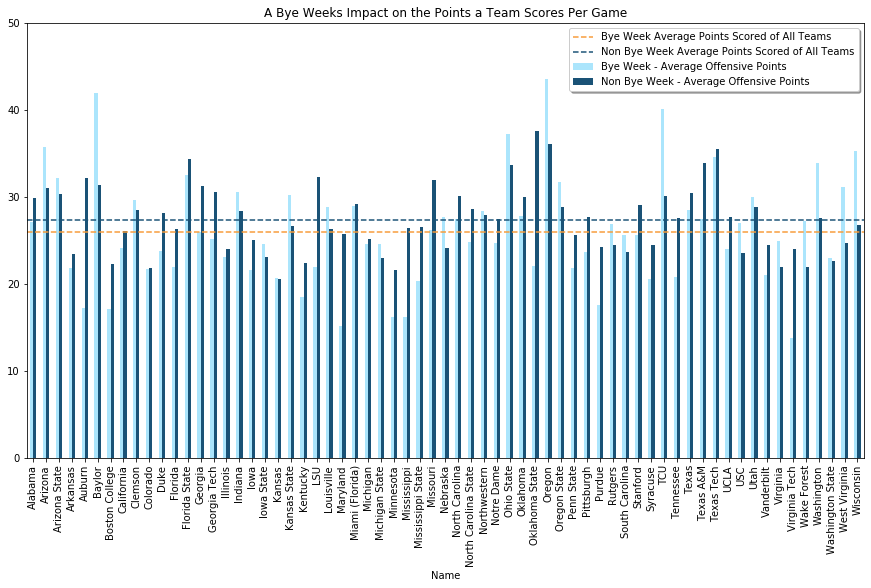

In [317]:
#bar chart for points for

df_finaldata.plot(kind="bar", x="Name", y=["Bye Week - Average Offensive Points", "Non Bye Week - Average Offensive Points"], figsize=(15,8),
              title="A Bye Weeks Impact on the Points a Team Scores Per Game", color = ["#ABE5FC","#1A5276"])

meanByePts = df_finaldata["Bye Week - Average Offensive Points"].mean()
plt.axhline(y=meanByePts, c = "#F89C3A", ls = "--", label = "Bye Week Average Points Scored of All Teams")

meanNonByePts = df_finaldata["Non Bye Week - Average Offensive Points"].mean()
plt.axhline(y=meanNonByePts, c = "#1A5276", ls = "--",  label = "Non Bye Week Average Points Scored of All Teams")
plt.legend(shadow = True)
axes = plt.gca()
axes.set_ylim([0,50])

(0, 50)

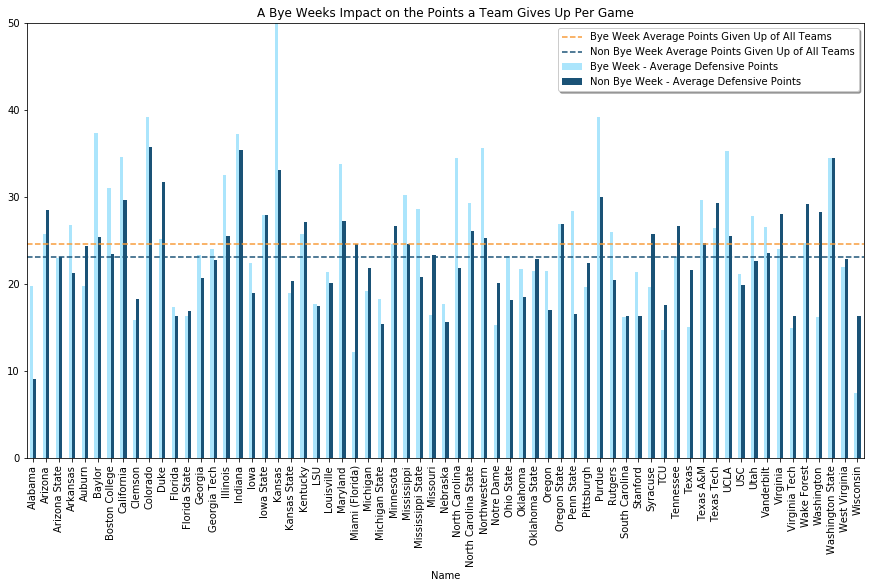

In [318]:
#bar chart for points against

df_finaldata.plot(kind="bar", x="Name", y=["Bye Week - Average Defensive Points", "Non Bye Week - Average Defensive Points"], figsize=(15,8),
              title="A Bye Weeks Impact on the Points a Team Gives Up Per Game", color = ["#ABE5FC","#1A5276"])

meanByePtsAgainst = df_finaldata["Bye Week - Average Defensive Points"].mean()
plt.axhline(y=meanByePtsAgainst, c = "#F89C3A", ls = "--", label = "Bye Week Average Points Given Up of All Teams")

meanNonByePtsAgainst = df_finaldata["Non Bye Week - Average Defensive Points"].mean()
plt.axhline(y=meanNonByePtsAgainst, c = "#1A5276", ls = "--",  label = "Non Bye Week Average Points Given Up of All Teams")
plt.legend(shadow = True)
axes = plt.gca()
axes.set_ylim([0,50])

Text(0.91, 0.5, 'Note: Circle size correlates with wins after bye weeks per team.')

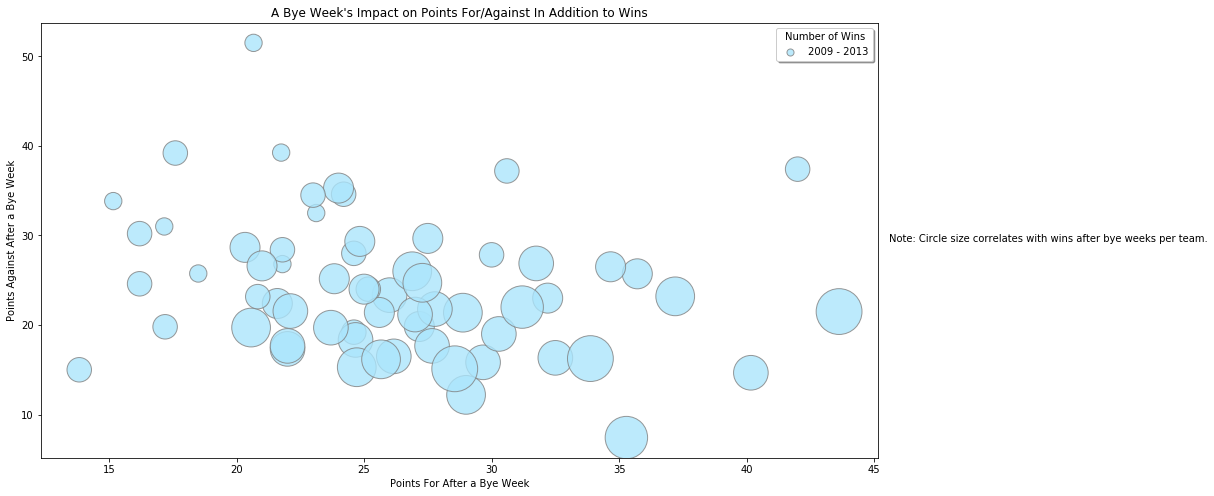

In [319]:
#bubble chart for point comparison to wins
x = df_finaldata["Bye Week - Average Offensive Points"]
y = df_finaldata["Bye Week - Average Defensive Points"]
z = df_finaldata["Wins after Bye Week"]


plt.figure(figsize=(15,8))
plt.scatter(x, y, s=z*300, alpha=0.8, c = "#ABE5FC", edgecolors = "grey")
plt.xlabel("Points For After a Bye Week")
plt.ylabel("Points Against After a Bye Week")
plt.title("A Bye Week's Impact on Points For/Against In Addition to Wins")


lgnd=plt.legend(["2009 - 2013"], loc="best", title="Number of Wins", shadow = True)
lgnd.legendHandles[0]._sizes = [50]

# Incorporate a text label regarding circle size
plt.figtext(.91,.5,"Note: Circle size correlates with wins after bye weeks per team.")

Text(0.91, 0.5, 'Note: Circle size correlates with wins after bye weeks per team.')

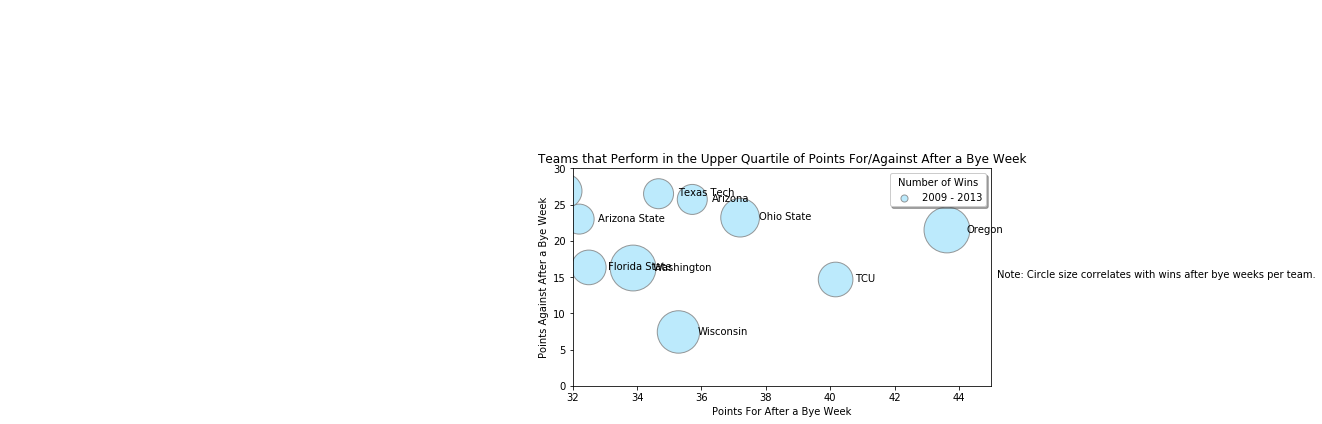

In [320]:
#bubble chart for point comparison to wins for best teams
x = df_finaldata["Bye Week - Average Offensive Points"]
y = df_finaldata["Bye Week - Average Defensive Points"]
teams = df_finaldata["Name"]
z = df_finaldata["Wins after Bye Week"]


plt.figure(figsize=(7.5,4))

#plt.figure(figsize=(15,8))

plt.scatter(x, y, s=z*300, alpha=0.8, c = "#ABE5FC", edgecolors = "grey")

   

plt.xlabel("Points For After a Bye Week")
plt.ylabel("Points Against After a Bye Week")
plt.title("Teams that Perform in the Upper Quartile of Points For/Against After a Bye Week")

axes = plt.gca()
axes.set_ylim([0,30])
axes.set_xlim([32,45])


#found code online to help annotate the team names

for i, txt in enumerate(df_finaldata["Name"]):
    axes.annotate(txt, (x[i], y[i]), xytext=(x[i]+.6, y[i]-.3))



lgnd=plt.legend(["2009 - 2013"], loc="best", title="Number of Wins", shadow = True)
lgnd.legendHandles[0]._sizes = [50]

# Incorporate a text label regarding circle size
plt.figtext(.91,.5,"Note: Circle size correlates with wins after bye weeks per team.")


Text(0.91, 0.5, 'Note: Circle size correlates with wins after bye weeks per team.')

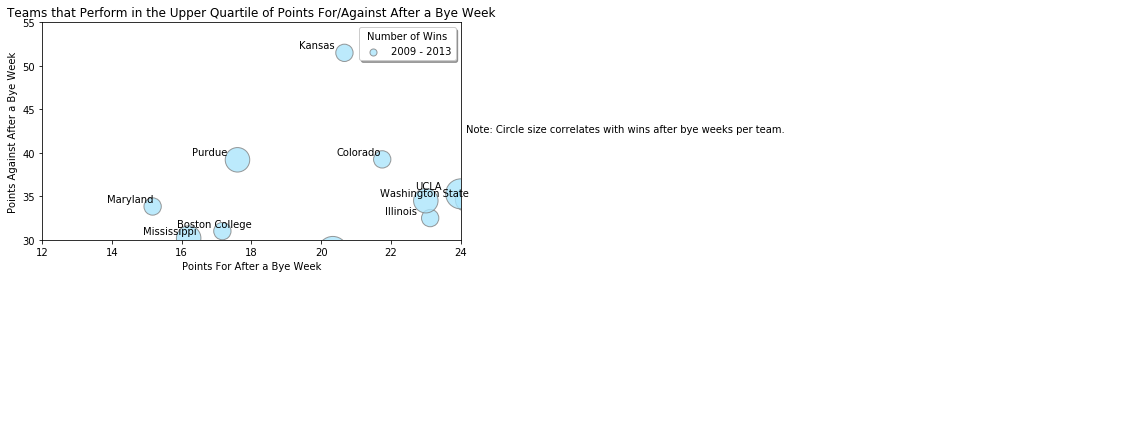

In [321]:
#bubble chart for point comparison to wins for worst teams
x = df_finaldata["Bye Week - Average Offensive Points"]
y = df_finaldata["Bye Week - Average Defensive Points"]
z = df_finaldata["Wins after Bye Week"]

plt.figure(figsize=(7.5,4))
plt.scatter(x, y, s=z*300, alpha=0.8, c = "#ABE5FC", edgecolors = "grey")
plt.xlabel("Points For After a Bye Week")
plt.ylabel("Points Against After a Bye Week")
plt.title("Teams that Perform in the Upper Quartile of Points For/Against After a Bye Week")

axes = plt.gca()
axes.set_ylim([30,55])
axes.set_xlim([12,24])

#found code online to help annotate the team names
for i, txt in enumerate(df_finaldata["Name"]):
    axes.annotate(txt, (x[i], y[i]), xytext=(x[i]-1.3, y[i]+.5))

lgnd=plt.legend(["2009 - 2013"], loc="best", title="Number of Wins", shadow = True)
lgnd.legendHandles[0]._sizes = [50]

# Incorporate a text label regarding circle size
plt.figtext(.91,.5,"Note: Circle size correlates with wins after bye weeks per team.")

<Figure size 1080x576 with 0 Axes>

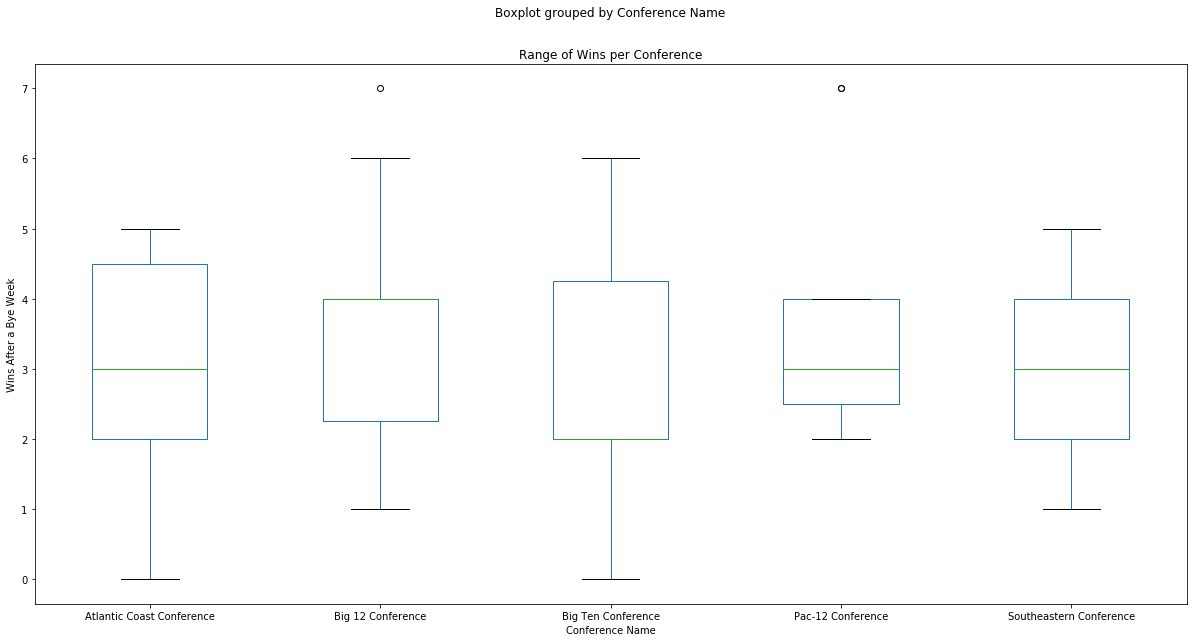

In [325]:
plt.figure(figsize=(15,8))

df_conf=df_finaldata[df_finaldata["Conference Name"]!="Independent"]


df_conf.boxplot("Wins after Bye Week", by="Conference Name", figsize=(20, 10))
plt.title("Range of Wins per Conference")
plt.ylabel("Wins After a Bye Week")
plt.grid(False)

In [323]:
# Extract individual groups
ACC = df_finaldata[df_finaldata["Conference Name"] == "Atlantic Coast Conference"]["Wins after Bye Week"]
SEC = df_finaldata[df_finaldata["Conference Name"] == "Southeastern Conference"]["Wins after Bye Week"]
Pac12 = df_finaldata[df_finaldata["Conference Name"] == "Pac-12 Conference"]["Wins after Bye Week"]
Big10 = df_finaldata[df_finaldata["Conference Name"] == "Big Ten Conference"]["Wins after Bye Week"]
Big12 = df_finaldata[df_finaldata["Conference Name"] == "Big 12 Conference"]["Wins after Bye Week"]
# ANOVA Test
stats.f_oneway(ACC, SEC, Pac12, Big10, Big12)

F_onewayResult(statistic=0.6077054375834634, pvalue=0.6586583395727523)